**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import plotly.express as ex

import warnings
warnings.filterwarnings('ignore')

**Creating datas**

In [5]:
samples = 7000
center = [[4,4], [-2, -1], [2, -3], [1, 1]]
stds = 0.9

In [6]:
X, y = make_blobs(n_samples=samples,
                  cluster_std=stds,
                  centers=center)
X.shape, y.shape

((7000, 2), (7000,))

**Visualizing data**

In [11]:
# Separating centers
center = np.array(center)
center_0 = center[:, 0]
center_1 = center[:, 1]

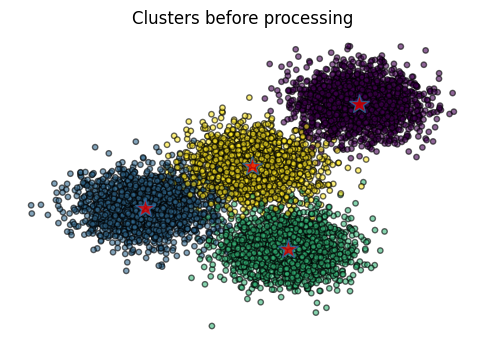

In [29]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], marker='.', cmap='viridis', c=y, s=60, ec='k', alpha=0.6)
ax.plot(center_0, center_1, marker='*', ms=15, mfc='red', ls='None', alpha=0.7)
ax.set_title('Clusters before processing')
plt.axis('off')
plt.show()

**Building model**

Inertia: 8023.880483417042


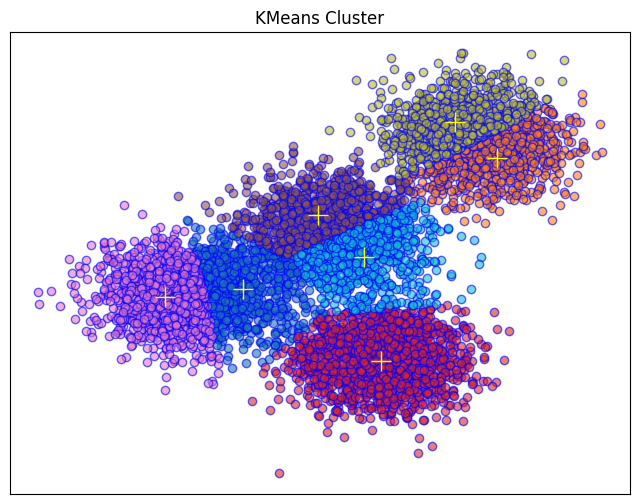

Result: 2575 out of 7000 samples were correctly labeled.


In [110]:
def model_building(cluster):
    model = KMeans(n_clusters=cluster, 
                   init='k-means++',
                   n_init=12,
                   random_state=42)
    model.fit(X)
    global labels, centers
    labels = model.labels_
    centers = model.cluster_centers_
    inet = model.inertia_
    print(f'Inertia: {inet}')

    def visualize_data():
        fig = plt.figure(figsize=(8, 6))
        ax_k = fig.add_subplot(1, 1, 1)
        colors = plt.cm.tab10(np.linspace(0, 1, len(set(labels))))
        for k, color in enumerate(colors):
            # Mapping color and label for each clusters
            cluster_center = centers[k]
            ax_k.plot(X[labels==k, 0], X[labels==k, 1], marker='.', mfc=color, mec='b', ms=12, alpha=0.6, ls='None')
            ax_k.plot(cluster_center[0], cluster_center[1], marker='+', mfc='green', mec='yellow', ms=15, alpha=1)
        ax_k.set_title('KMeans Cluster')
        ax_k.set_xticks([])
        ax_k.set_yticks([])
        plt.show()
    visualize_data()

    # Finding accuracy
    accurate_cluster = sum(labels==y)
    print("Result: %d out of %d samples were correctly labeled." % (accurate_cluster, y.size))
model_building(7)

**Finding best value of `k` using `elbow method`**

Result: 2763 out of 7000 samples were correctly labeled.
Model accuracy: 39.471%


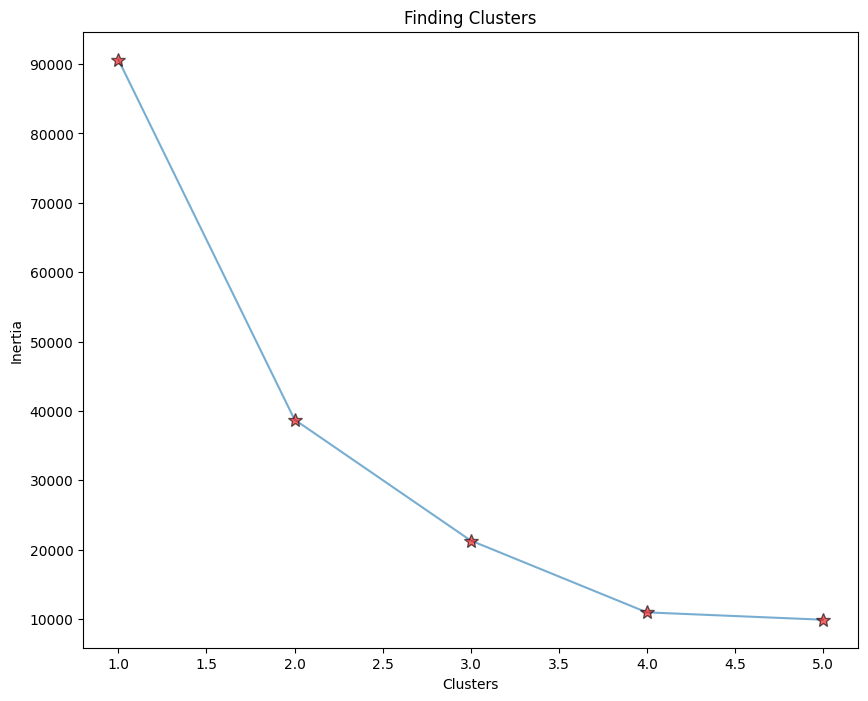

In [124]:
def finding_best_k(clusters):
    clust = []
    for k in range(1, clusters):
        model = KMeans(init='k-means++',
                       n_clusters=k,
                       n_init=12,
                       random_state=42)
        model.fit(X)
        inertia_k = model.inertia_
        clust.append(inertia_k)
    labels_k = model.labels_
    centers_k = model.cluster_centers_
    accurate_labels = sum(labels_k==y)
    print(f'Result: {accurate_labels} out of {y.size} samples were correctly labeled.')
    accuracy = ((accurate_labels)/y.size)*100
    print(f'Model accuracy: {accuracy:.3f}%')
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(range(1, clusters), clust, marker='*', mfc='red', mec='k', alpha=0.6, ms=10)
    ax.set_title('Finding Clusters')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')
    plt.show()
finding_best_k(6)
